# Sobol Sampling: Tutorial
> For the Fall 2024 course: *Machine Learning in Physics*<br>
> Created: Aug. 14, 2024 Harrison B. Prosper

## Introduction
Ilya Sobol was a Russian mathematician, who devised an algorithm to distribute points in a way that is more uniform than occurs with random uniform sampling. Here we show how to call the Sobol sampler in scipy.

In [4]:
# standard system modules
import os, sys

# standard module for tabular data
import pandas as pd

# standard module for array manipulation
import numpy as np

# standard module for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt

# needed to generate Sobol sequences of points (quasi-random sampling)
from scipy.stats import qmc

# update fonts
FONTSIZE = 12
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility
seed = 128
rnd  = np.random.RandomState(seed)

## Sobol quasi-random sampling

In [10]:
def sobol_sequence(D, P, bounds=None):
    # D: dimension of input space
    # P: number of points = 2^P
    
    # generate 2^P points in D-dimensional unit hypercube
    sampler= qmc.Sobol(d=D, scramble=True)
    sample = sampler.random_base2(m=P)

    # scale to desired size of hyperrectangle
    if type(bounds) != type(None):
        lower, upper = bounds
        sample = qmc.scale(sample, lower, upper)

    return sample

In [32]:
D = 2 # 2D space
P = 8 # N = 2^P: number of points
X = sobol_sequence(D, P)
X.shape

(256, 2)

## Uniform random sampling

In [33]:
Y = np.random.uniform(0, 1, X.shape)
Y.shape

(256, 2)

## Plot Points

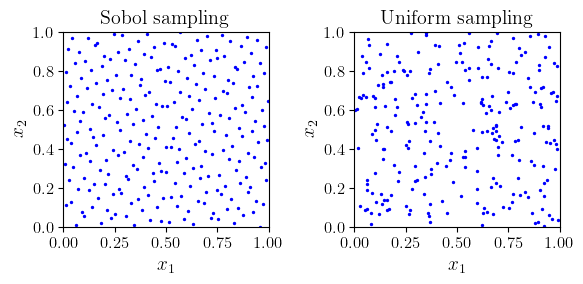

In [34]:
def plot_points(s, u, xmin=0, xmax=1, ymin=0, ymax=1,
                filename='points.png',
                msize=2,
                fgsize=(6, 3), 
                ftsize=14):

    # create an empty figure
    fig = plt.figure(figsize=fgsize)

    # Sobol quasi-random sampling
    nrows, ncols, index = 1, 2, 1
    ax = fig.add_subplot(nrows, ncols, index)
    ax.set_title('Sobol sampling')
    
    # setup x-axis
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$x_1$', fontsize=ftsize)
        
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$x_2$', fontsize=ftsize)

    s = s.T
    ax.scatter(s[0], s[1], color='blue', s=msize)

    # Uniform random sampling
    nrows, ncols, index = 1, 2, 2
    ax = fig.add_subplot(nrows, ncols, index)
    ax.set_title('Uniform sampling')
    
    # setup x-axis
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r'$x_1$', fontsize=ftsize)
        
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel(r'$x_2$', fontsize=ftsize)

    u = u.T
    ax.scatter(u[0], u[1], color='blue', s=msize)

    fig.tight_layout()
    plt.savefig(filename)
    plt.show() 

plot_points(X, Y)